In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8395061728395061, Loss: 0.6632795687075015
Checkpoint 200, Accuracy: 0.845679012345679, Loss: 0.6652088871708622
Checkpoint 300, Accuracy: 0.8395061728395061, Loss: 0.659876858746564
Checkpoint 400, Accuracy: 0.845679012345679, Loss: 0.6595984564887153
Checkpoint 500, Accuracy: 0.8333333333333334, Loss: 0.6637046248824509


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.9019005 ]
 [0.07400832]
 [0.02409117]]
[1. 0. 0.] <-> [[0.8922591 ]
 [0.0800329 ]
 [0.02770803]]
[1. 0. 0.] <-> [[0.87161106]
 [0.09280528]
 [0.03558358]]
[1. 0. 0.] <-> [[0.85662395]
 [0.10195764]
 [0.04141843]]
[1. 0. 0.] <-> [[0.83622533]
 [0.11425424]
 [0.04952041]]
[1. 0. 0.] <-> [[0.8719698 ]
 [0.092585  ]
 [0.03544519]]
[1. 0. 0.] <-> [[0.7261752 ]
 [0.17766699]
 [0.09615782]]
[1. 0. 0.] <-> [[0.8510946 ]
 [0.1053089 ]
 [0.04359645]]
[0. 1. 0.] <-> [[0.75231194]
 [0.16302669]
 [0.08466129]]
[1. 0. 0.] <-> [[0.76265454]
 [0.15716386]
 [0.08018168]]
[1. 0. 0.] <-> [[0.8070911 ]
 [0.13150746]
 [0.06140142]]
[1. 0. 0.] <-> [[0.78882056]
 [0.14214979]
 [0.06902965]]
[1. 0. 0.] <-> [[0.8995297 ]
 [0.07549304]
 [0.02497733]]
[0. 0. 1.] <-> [[0.8981573 ]
 [0.07635149]
 [0.02549121]]
[0. 1. 0.] <-> [[0.38638404]
 [0.34483543]
 [0.2687805 ]]
[0. 0. 1.] <-> [[0.52134204]
 [0.28393686]
 [0.19472113]]
[0. 1. 0.] <-> [[0.04418806]
 [0.40105948]
 [0.5547524 ]]
[1. 0. 0.] <->

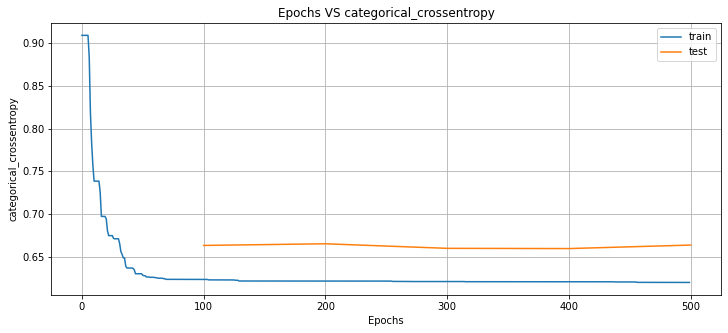

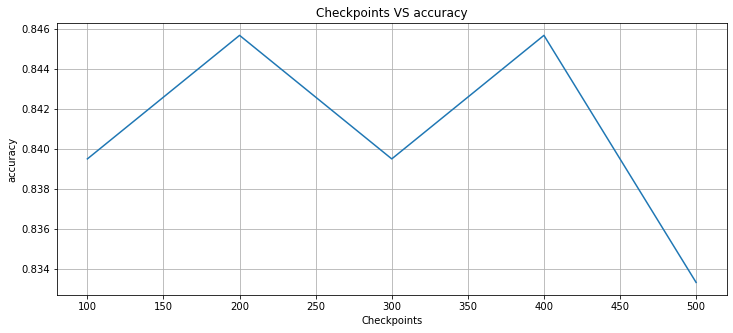

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8395061728395061, 'mean_square_error': 2.996346180319057, 'categorical_crossentropy': 0.6632795687075015, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 1}, 1: {'tp_hit': 2, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 14}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.845679012345679, 'mean_square_error': 2.9682088910605984, 'categorical_crossentropy': 0.6652088871708622, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 21, 'tn_hit': 9, 'fn_hit': 1}, 1: {'tp_hit': 3, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 13}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.8395061728395061, 'mean_square_error': 2.9718409816686875, 'categorical_crossentropy': 0.659876858746564, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 1}, 1: {'tp_hit': 2, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 14}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit':

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 1.5785321 ]
 [-1.865455  ]
 [-1.1096735 ]
 [-0.91040057]
 [ 1.9780445 ]]
 bias: [-0.5982532]

Neuron 1: weights:
[[ 0.12251438]
 [ 1.6713761 ]
 [ 0.6490489 ]
 [ 0.496648  ]
 [-2.0579479 ]]
 bias: [-1.8252528]

Neuron 2: weights:
[[-6.9090474e-01]
 [ 6.8203080e-01]
 [ 1.0730362e+00]
 [ 5.2918243e-04]
 [-1.7992860e+00]]
 bias: [1.8900511]

Neuron 3: weights:
[[ 0.29272467]
 [ 1.647869  ]
 [-0.48273072]
 [ 1.2961296 ]
 [-2.1966724 ]]
 bias: [-1.5079722]

$
Layer 2
Neuron 0: weights:
[[ 1.3084178]
 [-2.342844 ]
 [ 2.0761275]
 [-1.5321169]]
 bias: [0.34965992]

Neuron 1: weights:
[[ 0.6969623 ]
 [ 0.6390203 ]
 [-1.457218  ]
 [-0.46554303]]
 bias: [1.4486271]

Neuron 2: weights:
[[-0.36427513]
 [ 0.338893  ]
 [-1.5604385 ]
 [ 2.0578518 ]]
 bias: [0.8257884]

$

